# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [216]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [217]:
device_data = pd.read_csv("C:/Phython/used_device_data.csv")

In [218]:
df=device_data.copy()

## Data Overview

- Observations
- Sanity checks

In [219]:
#Summary of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Observations:

1. The data has 11 numerical columns with type (float) and type (int).
2. The data has 4 objects which means the presence of 4 'categorical' columns.
3. There are few columns with non-null values less than 3454 which indicate data is missing from a few columns.



In [220]:
#First 5 rows
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


Observation:

The dataframe has 15 columns and each row represents deterministic parameters for used phones or tablets.


In [221]:
# last 5 rows
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [222]:
#Shape of Dataframe
df.shape

(3454, 15)

Observation:

The shape of Dataframe is (3454, 15) with 3454 rows and 15 columns.

In [223]:
# Statistical summary of Dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


Observation:

1. The mean normalized price for new phones is €5.2331 just a little higher than €4.364 of old phones.
2. The release_year of phones in this dataset range from 2013 to 2020, therefore the oldest phone is from 2013.
3. The number of days the device has been used range from 91 days to 1094 days.
4. The mean number of days for used devices is 674, quite close to the median of 690. 
5. The average screen size for phones is 13.7 cm and 75% phones are under screen size of 15.34 cm.
6. The average resolution for the main camera is 9.46 mp and 75% phones are under 13 mp.
7. The average resolution for a selfie camera is 6.55 mp and 75% phones are under 8 mp.
8. The average internal memory for a phone is 54.6 gb whereas maximum memory is 1024 gb.
9. The std deviation for internal memory is 84.9 gb and 75% of phones are under 64 gb memory.
10. The average battery for a phone is 3133  quite close to median battery of 3000.

In [224]:
# Duplicate Values in Dataframe

df.duplicated().sum()
print('Total number of duplicate values are:', df.duplicated().sum())

df.duplicated().value_counts()

Total number of duplicate values are: 0


False    3454
dtype: int64

In [225]:
# Null Values in Dataframe
df.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Observation:

1. The main_camera_mp has highest null values and 179 rows are missing values.
2. The selfie_camera_mp has 2; int_memory and ram has 4; battery has 6 and weight has 7 null values.

In [226]:
# Number of unique brands
df['brand_name'].nunique()

print('Number of unique brands:', df['brand_name'].nunique())

Number of unique brands: 34


In [227]:
#Name of all unique brands
brand = df['brand_name'].unique()
brand

array(['Honor', 'Others', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo',
       'LG', 'Meizu', 'Micromax', 'Motorola', 'Nokia', 'OnePlus', 'Oppo',
       'Realme', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Asus',
       'Coolpad', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon', 'Gionee',
       'Google', 'Karbonn', 'Microsoft', 'Panasonic', 'Sony', 'Spice',
       'XOLO'], dtype=object)

In [228]:
# Number of os
df['os'].nunique()
print('Number of os:', df['os'].nunique())

print('-------'*10)

df['os'].unique()
print('Unique os:\n', df['os'].unique())


Number of os: 4
----------------------------------------------------------------------
Unique os:
 ['Android' 'Others' 'iOS' 'Windows']


Observation:
    
1. There 34 unique brands of phones in this dataset.
2. There are 4 different OS(operating system) for the phones for this dataset

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

#### Plot the distribution plots for all the numerical features

In [229]:
#plot count 
def hist_box(data, column):
    
    """ data: input dataframe
       column:input column from dataframe """
    
    #subplots of histogram and boxplot
    fig, (ax_hist, ax_box) = plt.subplots(2 , figsize = (6,5))
    #plotting the title of graphs
    fig.suptitle(column)
    # plotting histogram 
    sns.histplot(data=data, x = column, ax=ax_hist, kde = True ) #plotting on first axis 
    
    #plotting mean line in histogram
    Mean=data[column].mean()
    ax_hist.axvline(x = Mean, color ='orange', linestyle="--") #plotting mean line on first axis
    #plotting Boxplot
    
    sns.boxplot(data = data, x=column, ax=ax_box, showfliers=True, color = 'orange') #plotting on 2nd axis
    plt.show()
    

In [230]:
def bar_plot(data, column): 
    
    plt.figure(figsize = (5,3))  
    plt.title( column , loc = 'center', fontsize = 13) # Plot title on top of plot

    # plot the countplot for distribution 
    sns.countplot(data = df, x = column, palette = 'Set2')
    plt.xticks(rotation=45)


**Normalized_used_price**

**What does the distribution of normalized used device prices look like?**

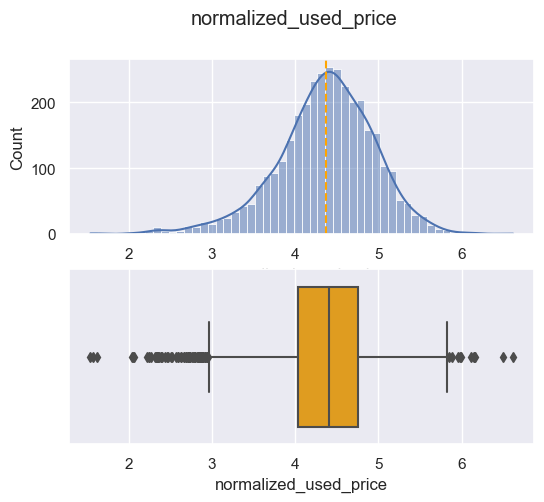

In [231]:
#Plot for "Normalized used price
hist_box(df, "normalized_used_price")

Observation:
    
1. The mean and median of normalized_used_price are quite close.
2. The data is normally distributed. 
3. There are outliers present on both sides.

**Normalized_new_price**

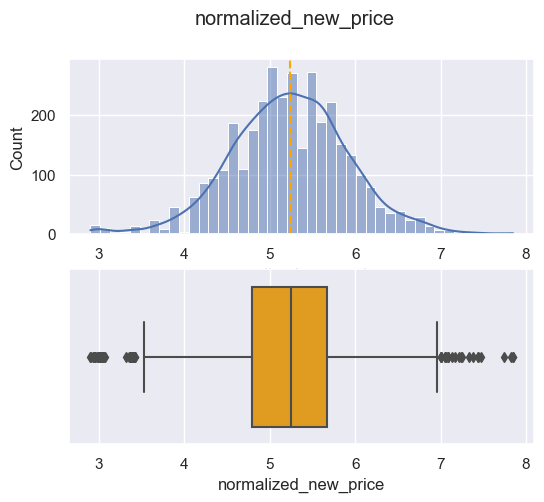

In [232]:
#Plot for "Normalized used price
hist_box(df, "normalized_new_price")

Observation:
    
1. The mean and median of normalized_new_price are quite close.
2. The data is normally distributed. 
3. There are outliers present on both sides.

**Screen_size**

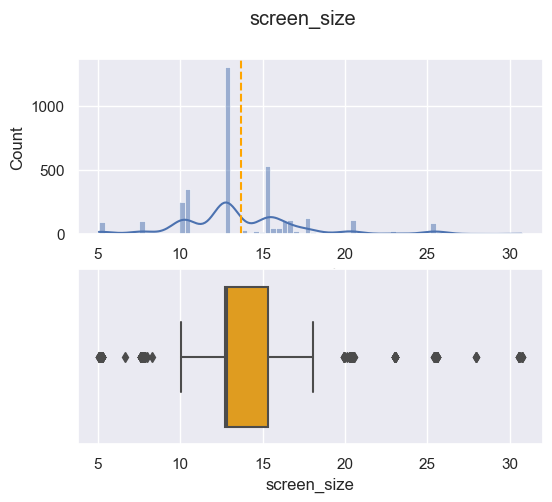

In [233]:
#Plot for "Screen size"
hist_box(df, "screen_size")

In [234]:
df['screen_size'].mode()

0    12.7
Name: screen_size, dtype: float64

Observation:
    
1. The median screen_size is 12.82 cm and mode is 12.7 cm.
2. The data is rightly skewed distributed. 
3. There are outliers present in the data.
4. Atleast 1200 phones in the dataset have screen size of 12.7 cm. 

**Selfie_camera_mp**

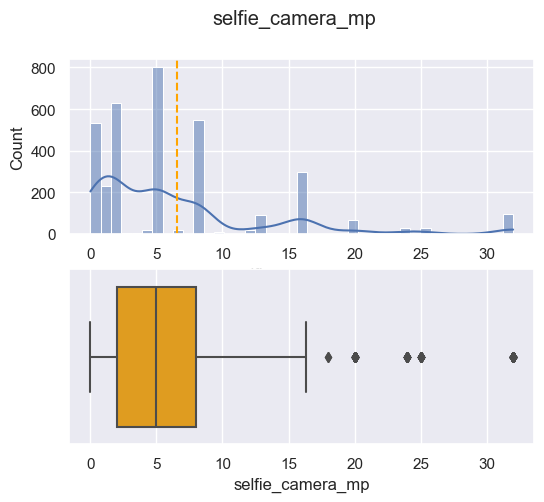

In [235]:
 ## Plot for 'selfie_camera_mp'
hist_box(df, 'selfie_camera_mp') 

Observation:

1. The median resolution of selfie_camera is 5 mp.
2. The distribution is rightly skewed.
3. There are outliers present on right extreme.
4. Atleast 800 phones in the dataset have selfie_camera of 5 mp.

**Main_Camera_mp**

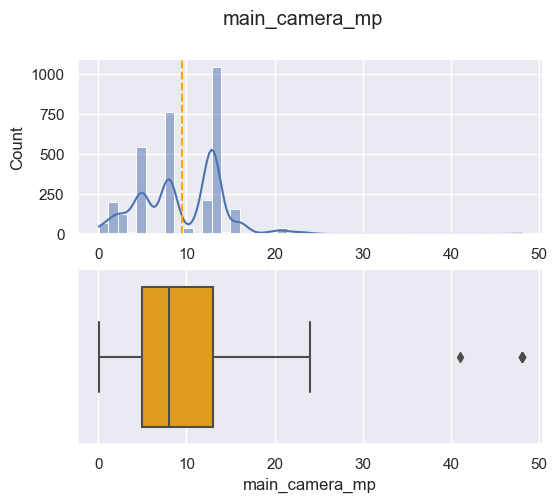

In [236]:
##plot for 'main_camera_mp'
hist_box(df, 'main_camera_mp')

In [237]:
df['main_camera_mp'].mode()

0    13.0
Name: main_camera_mp, dtype: float64

Observation:

1. The median resolution of main_camera is 8 mp.
2. The data is right skewed.
3. Only few outliers are present.
4. More than 1000 phones in the dataset have camera of 13 mp.

**Int_memory**

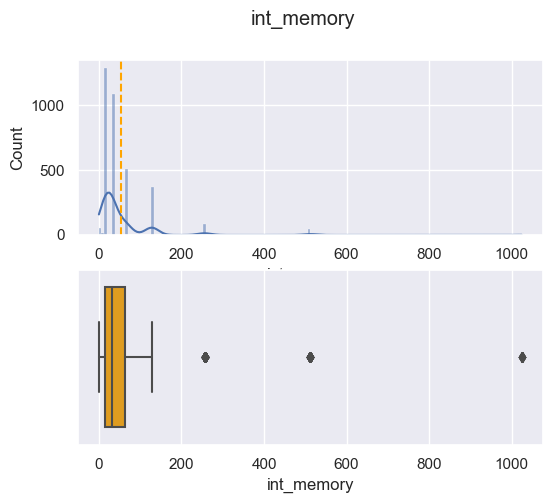

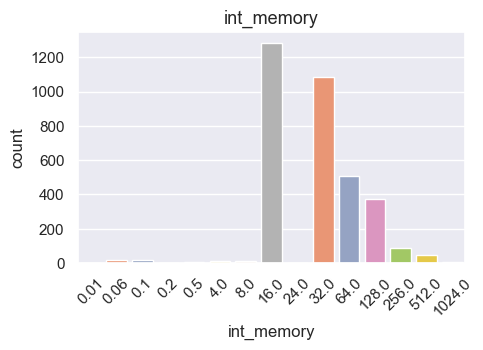

In [238]:
##plot for Int_memory
hist_box(df,'int_memory')
bar_plot(df,'int_memory')

Observation:

1. The median internal memory of phones is 32 gb.
2. The data is right skewed.
3. Very few outliers are present but have high standard deviation.
4. The data is numerical column but not continous therefore Barplot provide better countplot for int_memory. 
6. Approximately 1200 phones have 16gb of intenal memoery and 1000 phones have internal memory of 32 gb. 

**Ram**

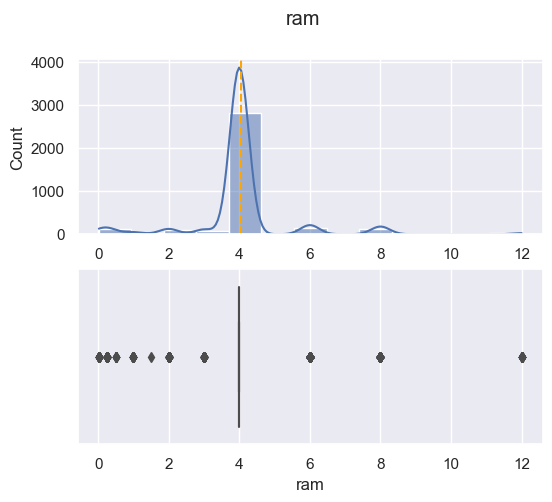

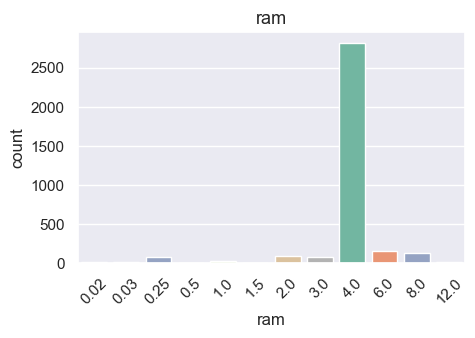

In [239]:
#Plot for "ram"
hist_box(df, 'ram')
bar_plot(df, 'ram')

Observation:

1. The median ram of phones is 4gb.
2. The data is right skewed.
3. The data is numerical column but not continous and distributed around few fixed numbers.
5. Approximately 2700 phones have 4gb of ram. 

**Weight**

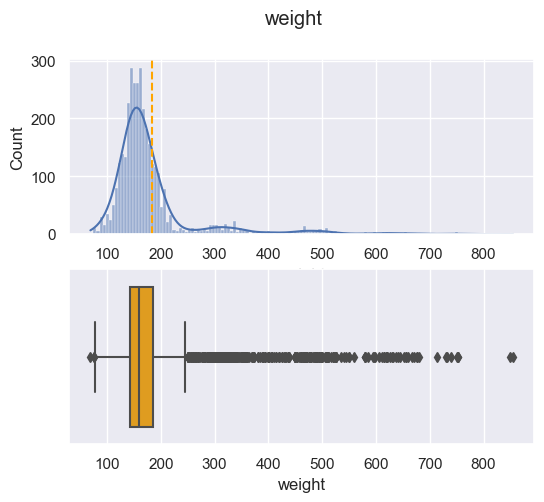

In [240]:
#Plot for "weight"
hist_box(df, 'weight')

Observation:

1. The median weight of phones is 160gm .
2. The data is right skewed.
3. There are many outliers present in the data.

**Battery**

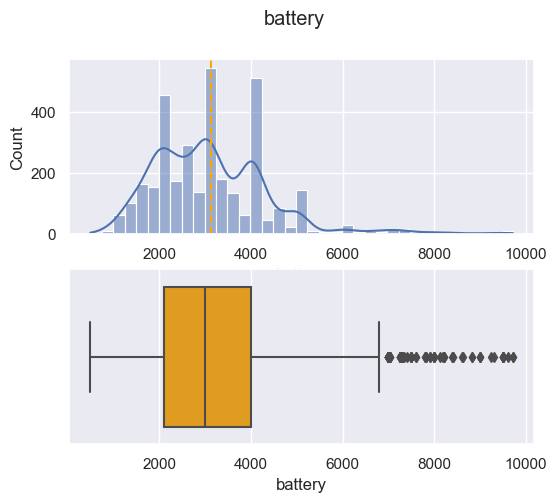

In [241]:
#Plot for "battery"
hist_box(df, 'battery')

Observation: 
    
1. The median battery is 3000 mAh. 
2. The data is right skewed.
3. There are outliers present in the data.

**Days used**

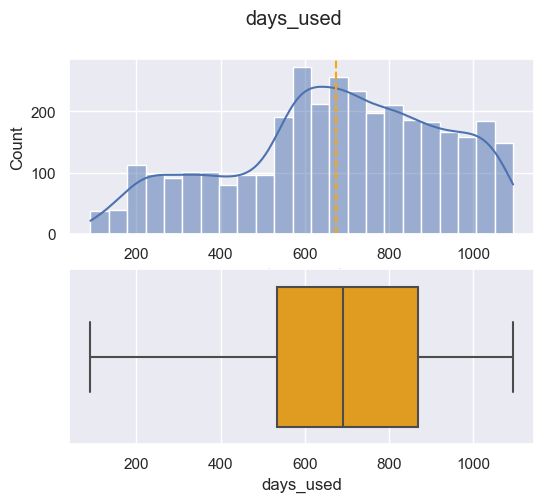

In [242]:
#Plot for "days_used"
hist_box(df, 'days_used')

Observation:

1. The median days phone has been used is 690 days
2. The data is left skewed.
3. More than 75% of phones have been used for atleast 500 days


**Release_year**

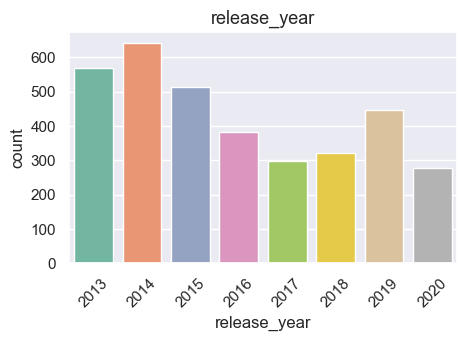

In [243]:
#Countplot for categorical value: 'Relase year'
plt.figure(figsize = (5,3))  
plt.title( "release_year", loc = 'center', fontsize = 13) # Plot title on top of plot

# plot the countplot for distribution 
sns.countplot(data = df, x = 'release_year', palette = 'Set2')
plt.xticks(rotation=45);

Observation:

1. The oldest phone in this dataset was released in 2013.
2. Maximum number of phones ( 600 ) are from 2014 released models.
3. The latest release model in this dataset is from year 2020.

#### BRAND NAME

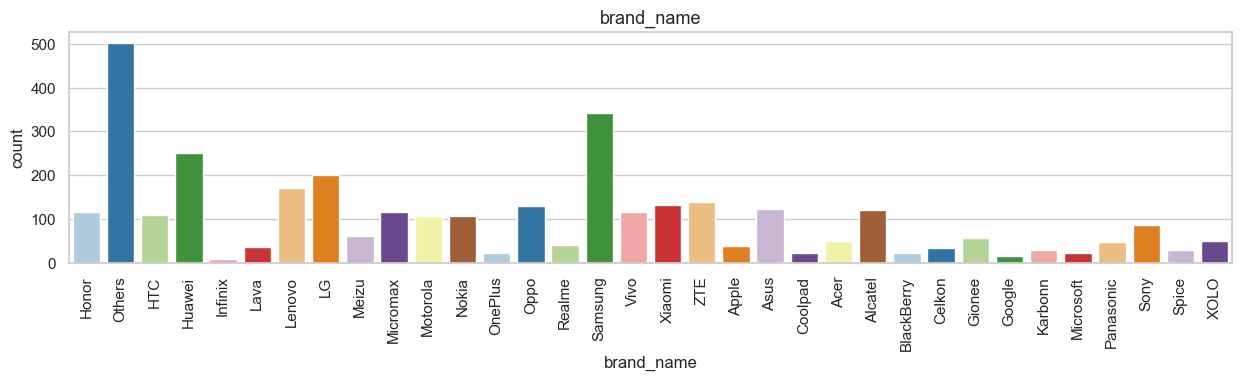

In [320]:
#Countplot for categorical value: 'Brand_name'
plt.figure(figsize = (15,3))  
plt.title( "brand_name", loc = 'center', fontsize = 13) # Plot title on top of plot

# plot the countplot for distribution 
sns.countplot(data = df, x = 'brand_name', palette = 'Paired')
plt.xticks(rotation=90);

Observation:

1. There are 34 unique brands of phones in this dataset.
2. Maximum number of phones belong to category 'others' which combined all the other brands not included in the dataset.
3. There are more than 300 phones from Samsung brand.
4. The lowest number of phones are from brand infinix. 

**OS**

**What percentage of the used device market is dominated by Android devices?**

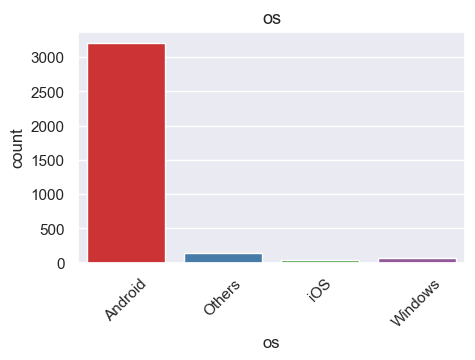

In [245]:
#Barplot for categorical value: 'OS'
plt.figure(figsize = (5,3))  
plt.title( "os", loc = 'center', fontsize = 13) # Plot title on top of plot

# plot the countplot for distribution 
sns.countplot(data = df, x = 'os', palette = 'Set1')
plt.xticks(rotation=45);

Observation:
    
1. More than 95% phones in this data have android as OS.
2. Lowest number of phones have iOS as operating system. 


**4g & 5g**

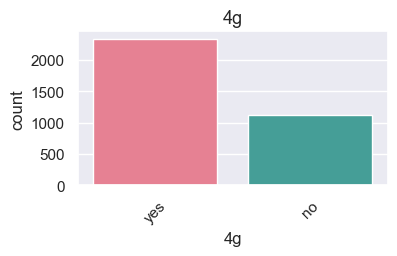

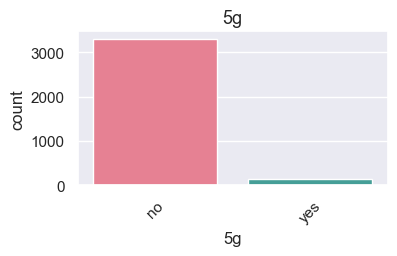

In [246]:
#Countplot for categorical value: '4g'
plt.figure(figsize = (4,2))  
plt.title( "4g", loc = 'center', fontsize = 13) # Plot title on top of plot

# plot the countplot for distribution 
sns.countplot(data = df, x = '4g', palette = 'husl')
plt.xticks(rotation=45);

#Countplot for categorical value: '5g'
plt.figure(figsize = (4,2))  
plt.title( "5g", loc = 'center', fontsize = 13) # Plot title on top of plot

# plot the countplot for distribution 
sns.countplot(data = df, x = '5g', palette = 'husl')
plt.xticks(rotation=45);

In [247]:
#Number of phones have 5G service
df[df['5g'] == 'yes'].shape

(152, 15)

Observation:
    
1. Two third of phones have 4g available.  
2. 5g is available in aroung 152 phones.
3. 4g and 5g is not available for around 1000 phones.

### Bivariate Analysis

**Plot the correlation heatmap and pairplot**

In [248]:
# Dropping categorical columns for pairplot 
dftest = df.drop(['4g','5g', 'release_year'], axis = 1)
df_attr = dftest.iloc[:, 2:13]
df_attr.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837


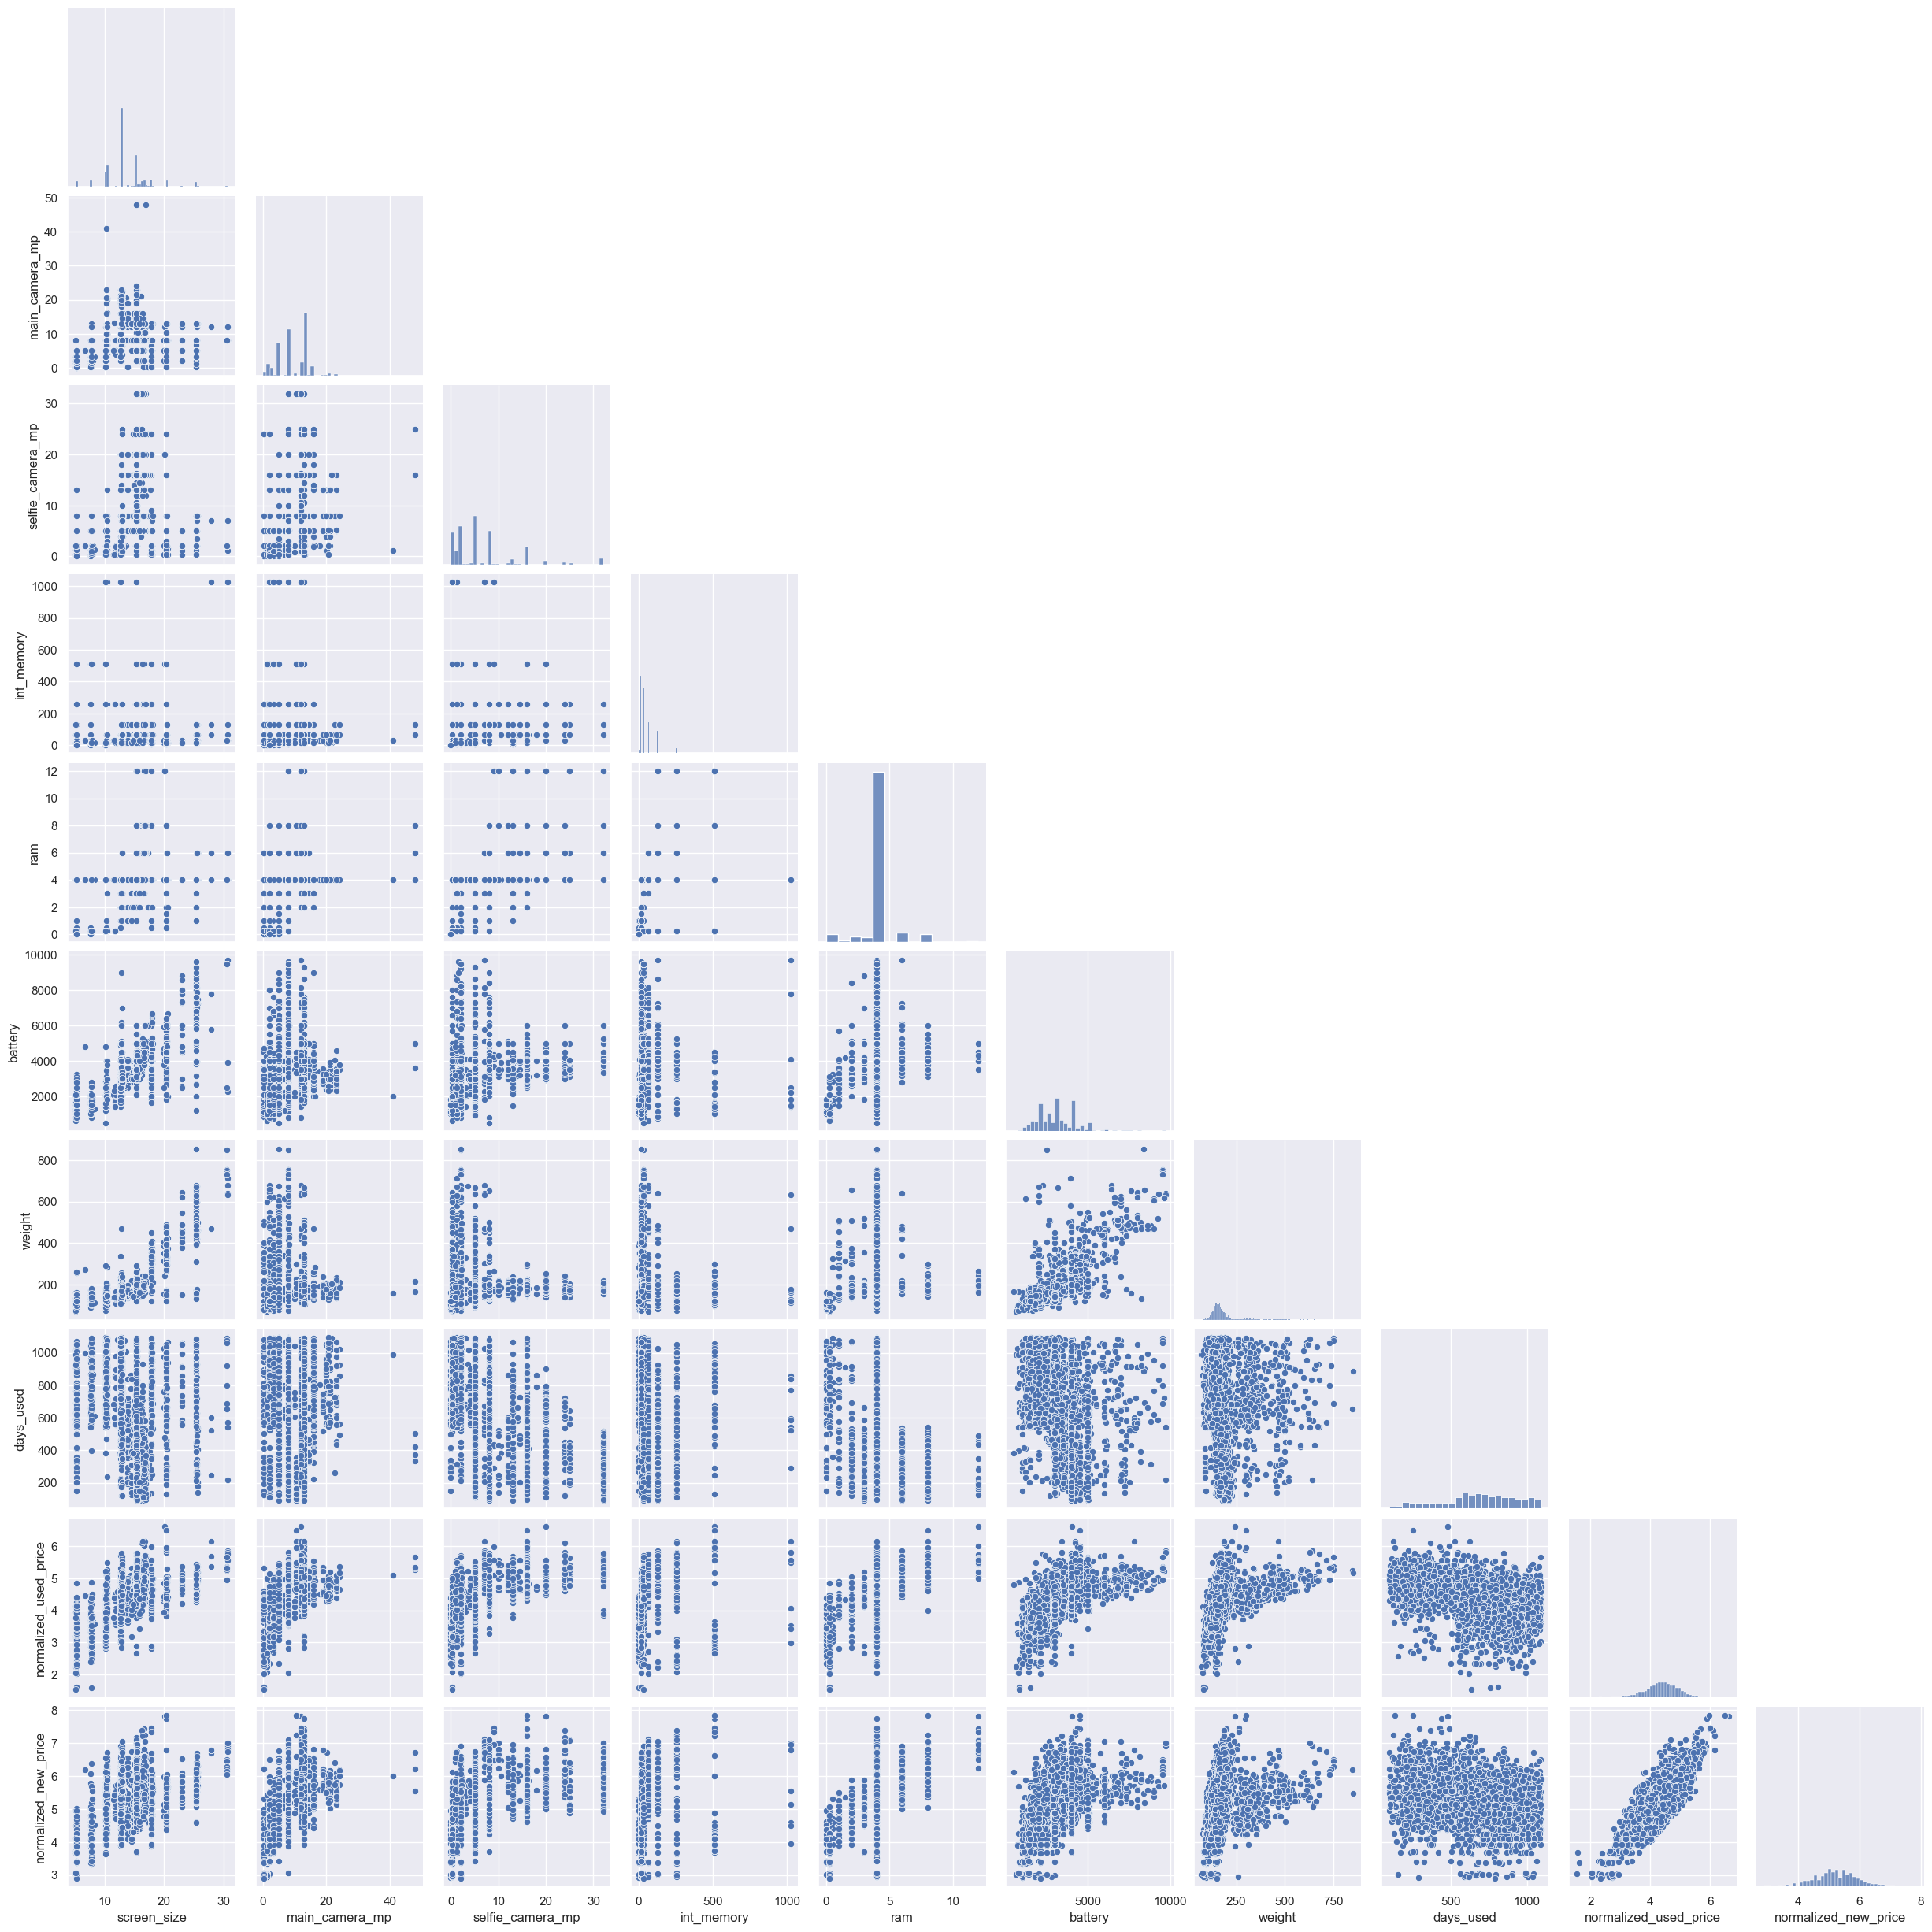

In [91]:
sns.pairplot(data=df_attr, corner = 'True')

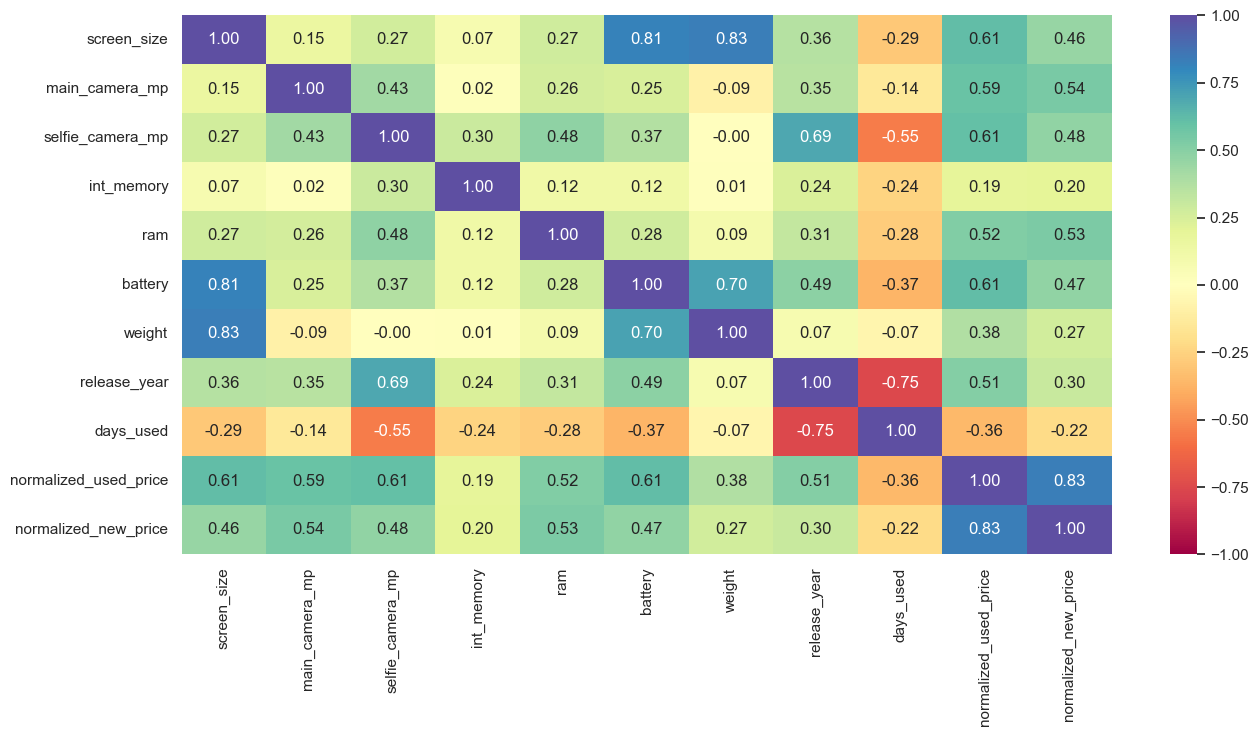

In [249]:
#calculate the correlation between the columns
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observation:
    
1. Battery and weight are correlated with .7 coefficient, with increase in battery size weight of phone increases too.
2. Release_year is negatively correlated (-.75) with days_used.
3. The main_camera_mp had low correlation of -.14 with respect to days used and .59 correlation with normalized_used_price.
4. The seflie_camera_mp has good correlation of -.55 with respect to days used and .61 correlation with normalized_used_price.
5. Int_memory have very little impact of price of phone.

Inference: The lower correlation coefficient of main_camera_mp as compared selfie_camera_mp with days_used indicates the quality of main camera does not depreciate much with time. 

**Which attributes are highly correlated with the normalized price of a used device?**

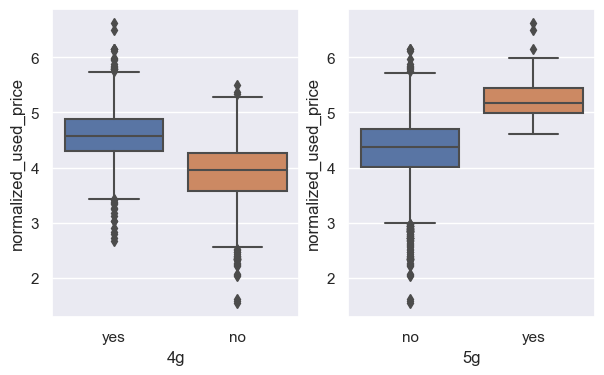

In [250]:
#Normalized used price for 4g and 5g phones
plt.figure(figsize=(7, 4))
plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")
plt.show()

Observation:
    
1. The normalized price of used device is highly correlated with its normalized new price.
2. The screen_size, selfie_camera_mp, and battery are other 3 major factors with high correlation coefficient of .61 
   with normalized used price.
3. The main_camera_mp also have high correlation of .59 with normalized used price.
4. 75% of phones have higher normalized price than €4.2 with availablity of 4g service. 
5. Whereas 75% have price lower than €4.2 without 4g service.
6. All the phones with 5g service have normalized used price of €4.5

    

**The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

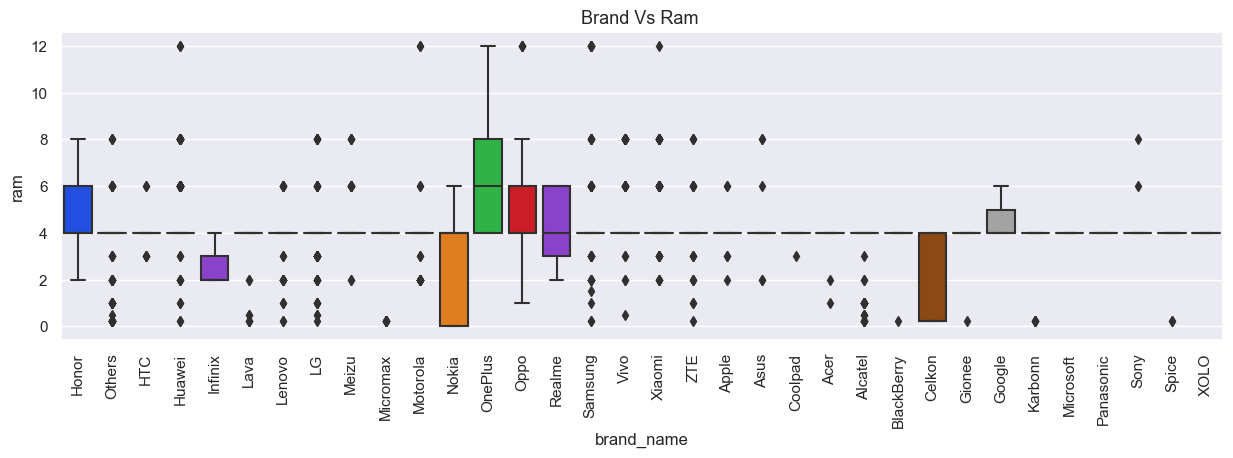

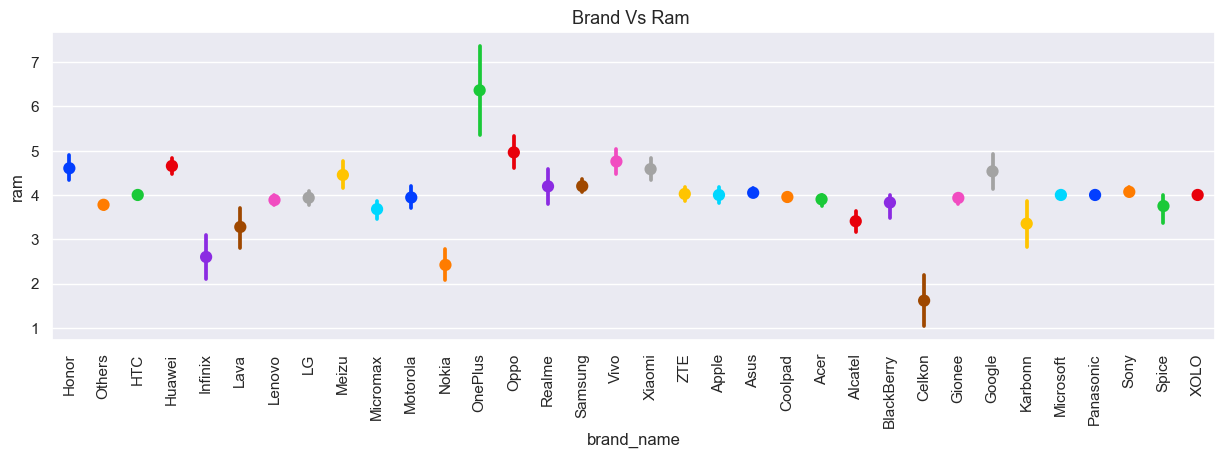

In [251]:
#plot box plot for 
plt.figure(figsize=(15, 4))
plt.title( "Brand Vs Ram ", loc = 'center', fontsize = 13)
sns.boxplot(data=df, y="ram", x="brand_name", palette = 'bright')
plt.xticks(rotation=90)

plt.figure(figsize=(15, 4))
plt.title( "Brand Vs Ram ", loc = 'center', fontsize = 13)
sns.pointplot(data=df, y="ram", x="brand_name", palette = 'bright')
plt.xticks(rotation=90)
plt.show()

Observation:
    
1. The highest RAM of 12 gb is available for Huawei, Motorola, Oppo, Samsung, Xiaomi.
2. Oneplus, Sony and Google are only brands where minimum RAM of phone is atleast 4 gb.
3. Microsoft, Xolo and Panasonic phones no RAM is provided in data. 
4. Most brands have mean RAM around 4gb .

**A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

**Brand_name vs Weight**

In [252]:
# all the phone with batter > 4500mAh
df['battery']>4500

#New dataframe with battery higher than 4500
df4500 = df[df['battery']>4500]
df4500.shape

(341, 15)

In [253]:
df4500['brand_name'].nunique()

25

In [254]:
df4500[df4500['weight']>400].brand_name.nunique()

13

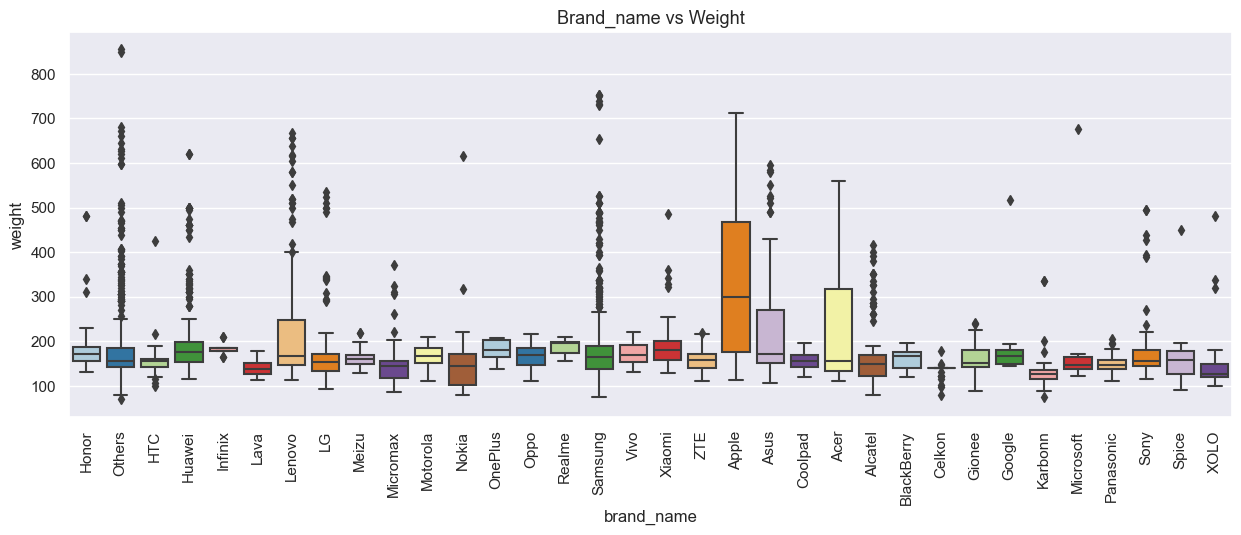

In [255]:
#boxplot for 'brand_name' and 'weight'
plt.figure(figsize=(15, 5))
plt.title('Brand_name vs Weight', size = 13)
sns.boxplot(data=df, x="brand_name", y="weight", palette = 'Paired')
plt.xticks(rotation=90)
plt.show()

Observation:
    
1. Out of total database 341 phones have battery more than 4500mAh.
2. Out of all 34 brands only 25 offer phones with heavier batteries.
3. Apple, Acer, Lenovo Asus are the 4 brands which have wide right skewed distribution.These 4 brand are actively manufacture
   tablets which could be reason of distribution skewing towards higher weight.
4. Samsung has normal distribution but with presence of too many outliers on higher end.
5. Atleast 75% of phone of all other brands weight less than 200 gm.
6. Atleast 14 brands do manufacture tablets or phone weighing more than 400gm. 

**Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

**Brand vs Screen size**

In [256]:
# Convert 6inch to cm
df['screen_size']>6*2.54
df6 = df[df['screen_size']>6*2.54]
df6.shape

(1099, 15)

In [257]:
#Number of unique brand
df6['brand_name'].nunique()

31

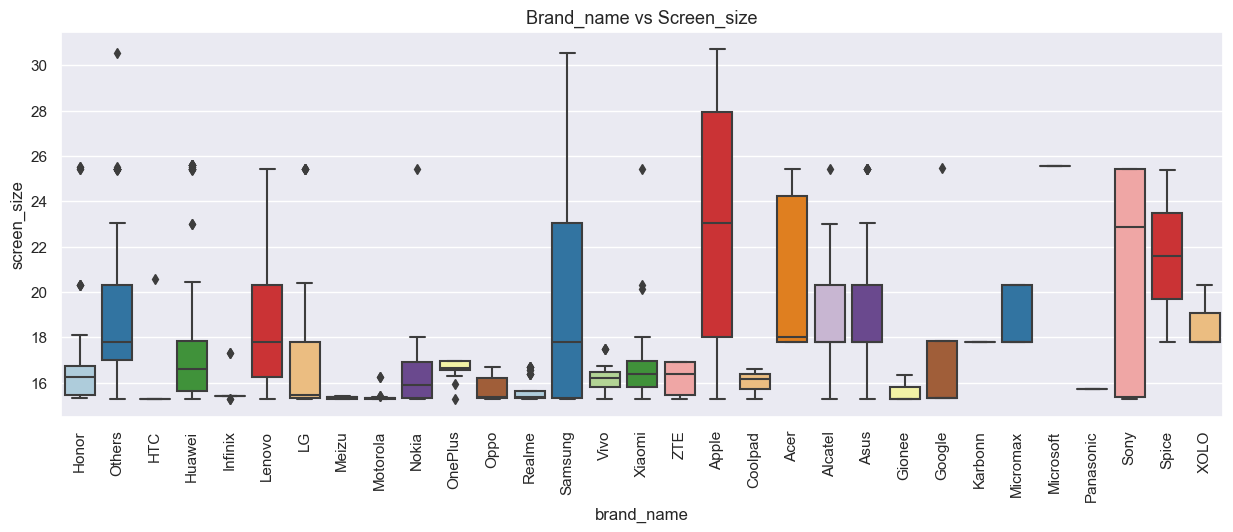

In [258]:
#Plot graph for screensize for different brand name
plt.figure(figsize=(15, 5))
plt.title('Brand_name vs Screen_size', size = 13)
sns.boxplot(data=df6, x="brand_name", y="screen_size", palette ='Paired')
plt.xticks(rotation=90)
plt.show()

Obeservation:

1. 31 out of 35 Number of brands in this dataset have screen_size higher than 6 inches.
2. Total 1099 phones have screensize more than 6 inches.
3. Samsung, Apple and others provide screen size of 30 cm.
4. Most common screen size lies within 14 to 18 cm.

**A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

**Brand_name vs Selfie_camera_mp**

In [259]:
# Dataframe with selfie camera mp > 8 
dfs8 = df[df.selfie_camera_mp > 8]
dfs8.shape

(655, 15)

In [260]:
#number of unique brands and maximum Megapixel for selfie camera 
dfs8.brand_name.nunique(), dfs8.selfie_camera_mp.max()


(25, 32.0)

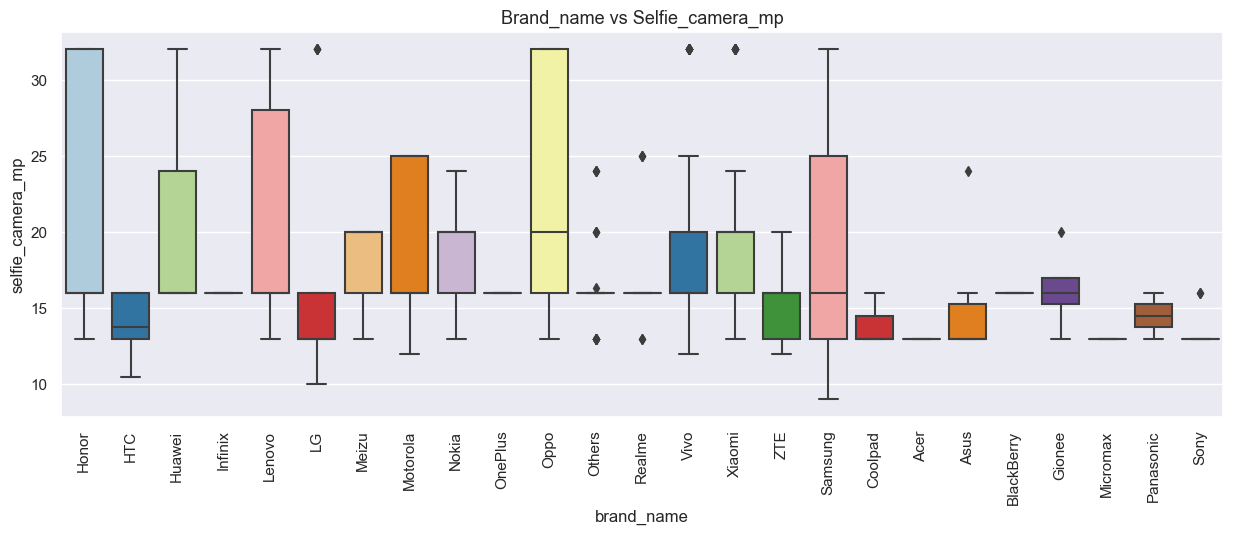

In [261]:
plt.figure(figsize=(15, 5))
plt.title('Brand_name vs Selfie_camera_mp', size = 13)
sns.boxplot(data=dfs8, x="brand_name", y="selfie_camera_mp", palette ='Paired')
plt.xticks(rotation=90)
plt.show()

Observation:
    
1. 25 brands in this dataset have selfie_camera_mp higher than 8 mp.
2. Total 655 phones have selfie_camera_mp higher than 8 mp.
3. Atleast 8 brands (Honor, Huawei, Lenovo, LS, Oppo, Vivo, Xiaomi, Samsung) have selfie camera more than 30 mp
4. Apart from 3 brands ( HTC, LG, Samsung), most brand in this set have atleast 12MP of selfie camera.
5. Samsung is widely distrubted from 8 to 32 MP for selfie camera.


**SImilarly What is the distribution of devices offering greater than 10MP main cameras across brands?**

**Brand_name vs Main_camera_mp**

In [262]:
# Dataframe with main camera mp > 10
dfm10 = df[df.main_camera_mp > 10]
dfm10.shape

(1547, 15)

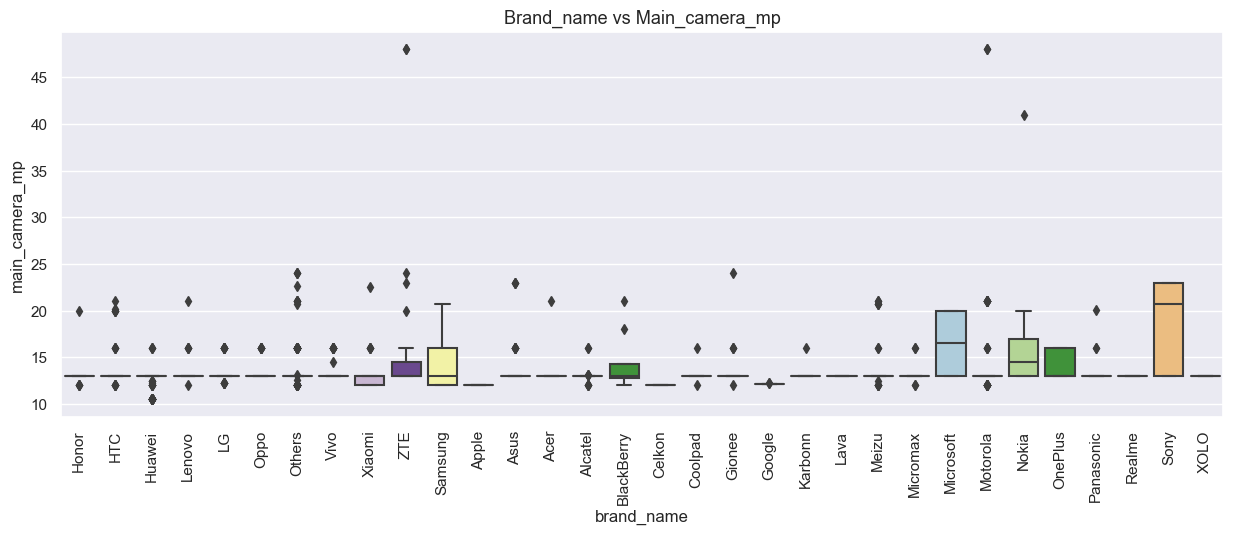

In [263]:
plt.figure(figsize=(15, 5))
plt.title('Brand_name vs Main_camera_mp', size = 13)
sns.boxplot(data=dfm10, x="brand_name", y="main_camera_mp", palette ='Paired')
plt.xticks(rotation=90)
plt.show()

Observation:
    
1. Total 1547 phones in this database have main_camera_mp more than 10 mp.
2. Nokia, Motorala, ZTE are three brands with main_camera_mp more than 40 mp.
3. Other than 3 brands most brands main_camera_mp is less than 25 mp.

**How the price of used devices varies across the years?**

**Release_year vs Normalized used price**

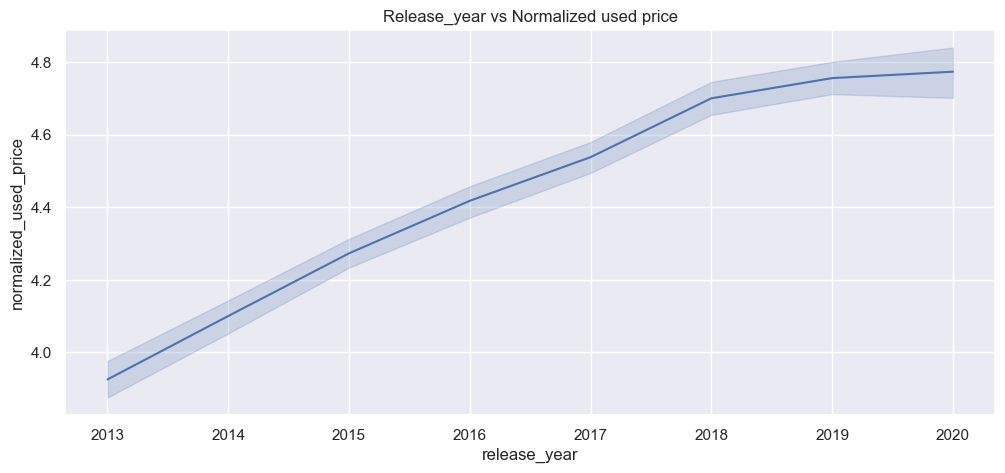

In [264]:
#plotting normalized used pricw with release year
plt.figure(figsize=(12, 5))
plt.title('Release_year vs Normalized used price')
sns.lineplot(data=df, y="normalized_used_price", x="release_year") ## Complete the code to create a lineplot 
plt.show()

Observation:
    
1. Normalized used price is directly correlated to its release year.
2. The price is highest for latest model and lowest for oldest model.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Imputation



In [265]:
df1=df.copy()

In [266]:
#Missing values in the database
df1.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [267]:
Misc = df1.select_dtypes(exclude=object).columns.tolist()
Misc

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

In [269]:
# Substitute missing values with median
# create list of all columns of dataframe excluding 'object'
Misc = df1.select_dtypes(exclude=object).columns.tolist()

for column in Misc:
    if df1[column].isna().sum() > 0:
        df1[column] = df1[column].fillna(
        value=df1.groupby(['release_year','brand_name'])[column].transform("median")
    ) 

#checking Missing values again
df1.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [270]:
# To substitute remaining missing values with median

for column in Misc:
    if df1[column].isna().sum() > 0:
        df1[column] = df1[column].fillna(value=df1.groupby(['brand_name'])[column].transform("median")
    ) 

#checking Missing values aain
df1.isna().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [271]:
df1['main_camera_mp'].median()

8.0

In [272]:
#df1.main_camera_mp.fillna rest with median 
df1["main_camera_mp"] = df1['main_camera_mp'].fillna(value = df1['main_camera_mp'].median())

#CHeck the na values in main camera column 
df1.main_camera_mp.isna().sum()

0

### Feature Engineering

In [273]:
#Create a new column years_since_release from the release_year column.
df1['year_sincereleased'] = 2023 - df1['release_year']
df1.head()


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,year_sincereleased
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,3
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,3
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,3
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,3
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,3


In [274]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
 15  year

In [275]:
#Drop the release_year column.
df1.drop(['release_year'], axis=1, inplace=True)
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,year_sincereleased
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,3
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,3
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,3
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,3
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,3


### Outlier Check


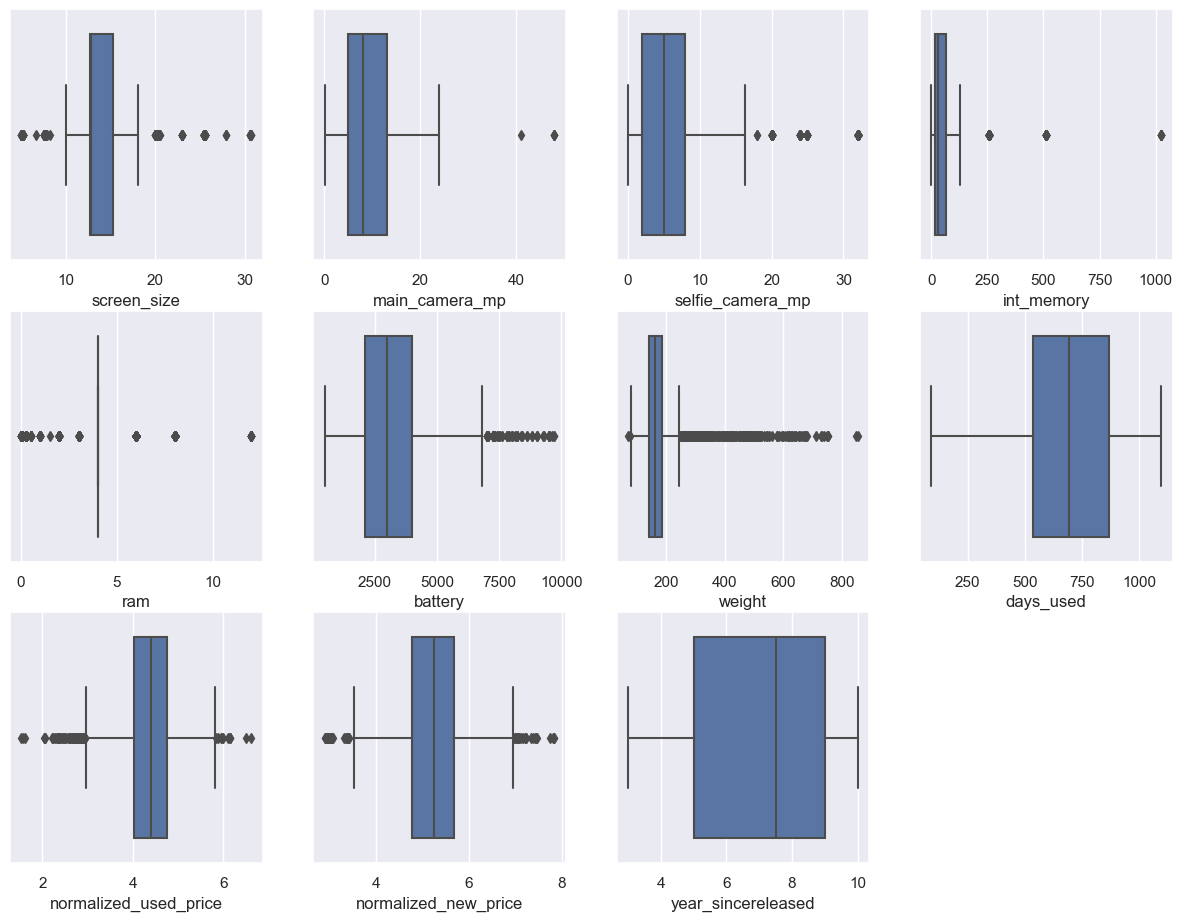

In [276]:
# outlier detection using boxplot

Misc2 = df1.select_dtypes(exclude=object).columns.tolist()
plt.figure(figsize=(15, 15))

for i, variable in enumerate(Misc2):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df1, x=variable)

plt.show()

Observation:
    
1. There are outliers in the data
2. As they are proper values we will  not treat them.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [277]:
df3_attr = df1.select_dtypes(exclude=object)
df3_attr.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,year_sincereleased
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,3
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,3
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,3
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,3
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,3


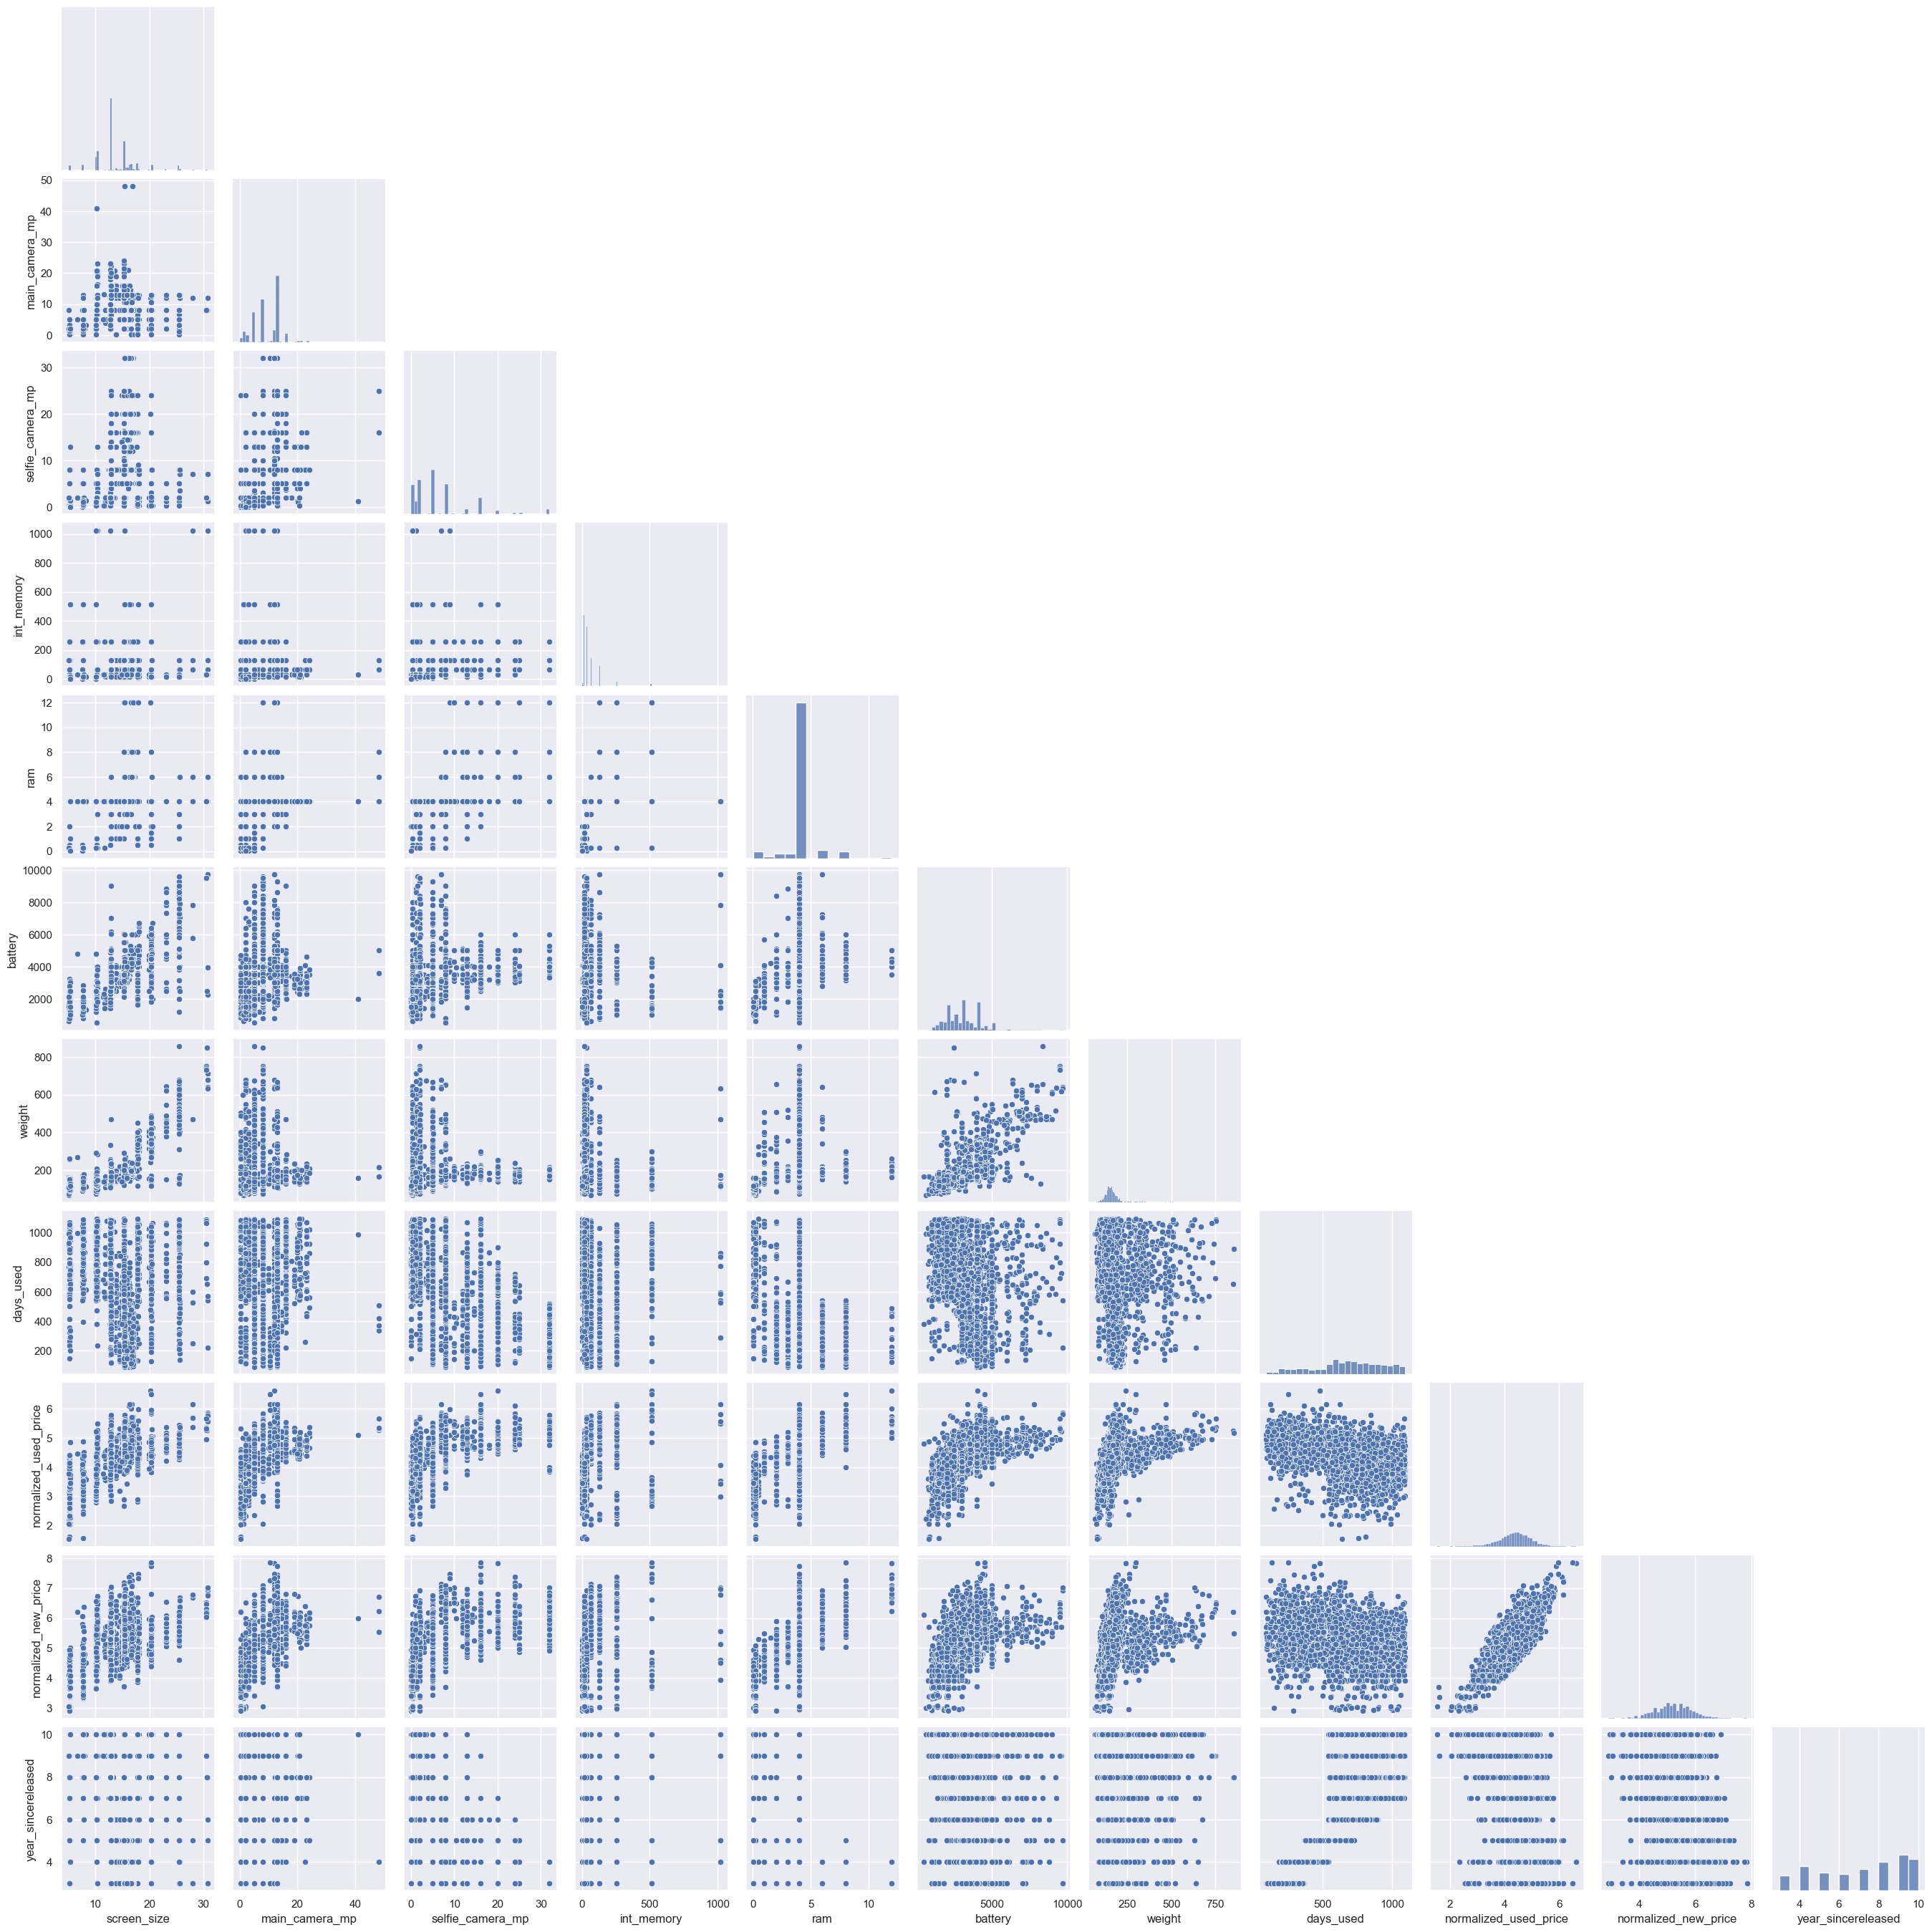

In [140]:
sns.pairplot(data=df3_attr, corner = 'True')

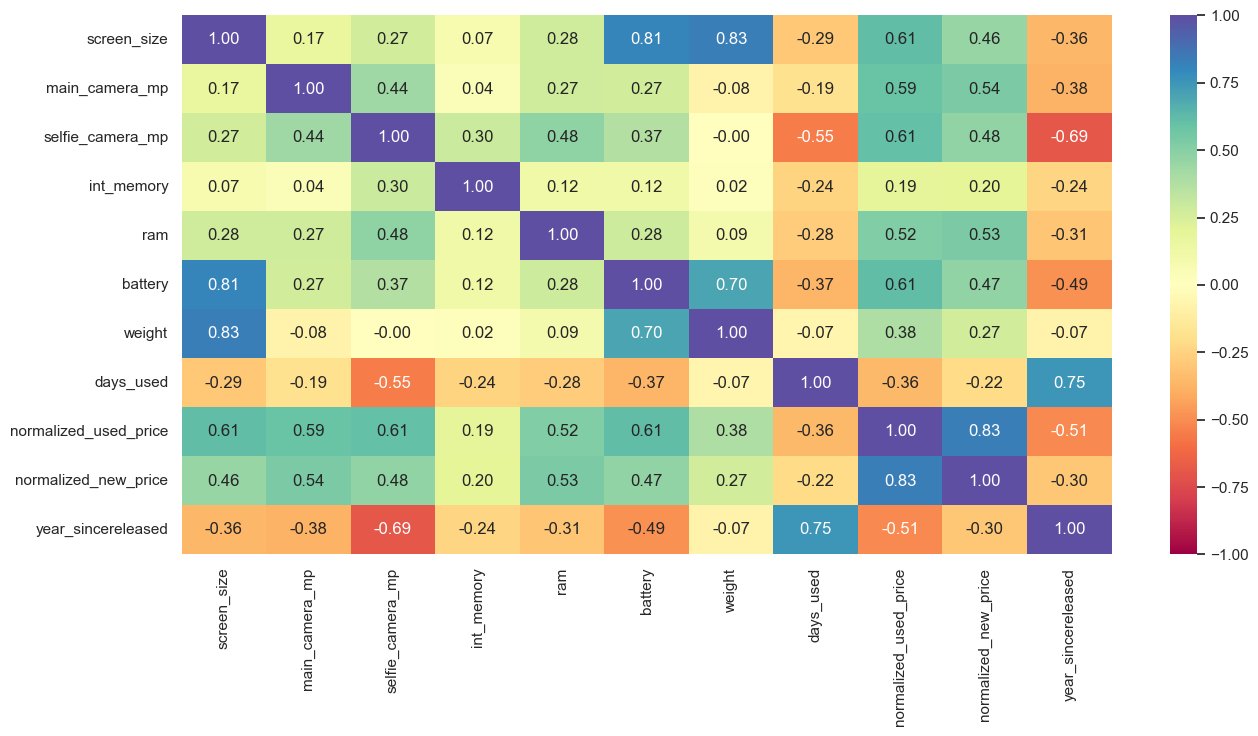

In [278]:
#calculate the correlation between the columns
plt.figure(figsize=(15, 7))
sns.heatmap(df3_attr.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

Observation:
    
1. The year_sincereleased is directly correlated with coefficient of .75 to days_used. 
2. The correlation coefficient of treated columns with respect to normalized-used_price has changed slightly.

### Data Preparation for modeling

In [279]:
# defining X and y variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

X.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,year_sincereleased
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,3
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,3
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,3
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,3
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,3


In [280]:
y.head()

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: normalized_used_price, dtype: float64

In [281]:
# let's add the intercept to data
X = sm.add_constant(X)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   const                 3454 non-null   float64
 1   brand_name            3454 non-null   object 
 2   os                    3454 non-null   object 
 3   screen_size           3454 non-null   float64
 4   4g                    3454 non-null   object 
 5   5g                    3454 non-null   object 
 6   main_camera_mp        3454 non-null   float64
 7   selfie_camera_mp      3454 non-null   float64
 8   int_memory            3454 non-null   float64
 9   ram                   3454 non-null   float64
 10  battery               3454 non-null   float64
 11  weight                3454 non-null   float64
 12  days_used             3454 non-null   int64  
 13  normalized_new_price  3454 non-null   float64
 14  year_sincereleased    3454 non-null   int64  
dtypes: float64(9), int64(

In [282]:
# Write all 4 object in list
Misc_object = X.select_dtypes(include=object).columns.tolist()
Misc_object


['brand_name', 'os', '4g', '5g']

In [283]:
# creating dummy variables
X = pd.get_dummies( X, columns=Misc_object, drop_first=True)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [284]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  3454 non-null   float64
 1   screen_size            3454 non-null   float64
 2   main_camera_mp         3454 non-null   float64
 3   selfie_camera_mp       3454 non-null   float64
 4   int_memory             3454 non-null   float64
 5   ram                    3454 non-null   float64
 6   battery                3454 non-null   float64
 7   weight                 3454 non-null   float64
 8   days_used              3454 non-null   int64  
 9   normalized_new_price   3454 non-null   float64
 10  year_sincereleased     3454 non-null   int64  
 11  brand_name_Alcatel     3454 non-null   uint8  
 12  brand_name_Apple       3454 non-null   uint8  
 13  brand_name_Asus        3454 non-null   uint8  
 14  brand_name_BlackBerry  3454 non-null   uint8  
 15  bran

In [285]:
# splitting the data in 70:30 ratio train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [286]:
# Shape of training data
x_train.shape

(2417, 49)

In [287]:
print("Train data =", len(x_train))
print("Test data =", len(x_test))

Train data = 2417
Test data = 1037


Obeservation:
    
1. The training and testing data split is 2417 : 1037.
2. After creation of summy variable for all the categorical variables, total number of columns for X is 49.

## Model Building - Linear Regression

In [288]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                           12:22:55   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Interpreting the Regression Results:

1. **Adjusted. R-squared**: 
It reflects the fit of the model. The value for adj. R-squared is 0.842, which is good fit model.

2. **R-Squared**:
The R-squared value tells us that our model can explain 84.5% of the variance in the training set.

3. **const Coefficient**:
It is the Y-intercept and 1.363 for this case.

3. **Coefficient of a predictor variable**:
It represents the change in the output Y due to a change in the predictor variable while everything else is constant.
The Coefficient for screen_size is 0.0244. 

## Model Performance Check

**We will be using metric functions defined in sklearn for RMSE (Root Mean Sqare Error), MAE (Mean Absolute Error) , and  𝑅2**

**We will define a function to calculate MAPE ( Mean absolute percentage error) and adjusted  𝑅2**
 .

In [289]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [290]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [291]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


Observation:
    
1. The training  𝑅-squared is 0.844886, so the model is not underfitting

2. The train and test data RMSE and MAE are quite low and comparable with each other,indicating model is not overfitting.

3. MAE (Mean absolute error) suggests that the model can predict normalized price within a mean adjusted error of 0.1847 on the test data.

4. MAPE of 4.501  on the test data means that we are able to predict within 4.501% of the normalized price of old phones. 

## Checking Linear Regression Assumptions

------------------------------------------------------------

We will be checking the following Linear Regression assumptions:

1. No Multicollinearity

2. Linearity of variables

3. Independence of error terms

4. Normality of error terms

5. No Heteroscedasticity

In order to make statistical inferences from a linear regression model, we have to check if assumptions of linear regression are satisfied.

### TEST FOR MULTICOLLINEARITY

Different ways of detecting multicollinearity. One such way is Variation Inflation Factor.

1. If VIF is 1 then there is no correlation between the  𝑘th predictor and the remaining predictor variables.
2. If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
3. If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [293]:
# fuction to check VIF

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))
    ]
    return vif

In [294]:
checking_vif(x_train)

,feature,VIF
0,const,240.588307
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


1. There are multiple columns with very high VIF values, indicating presence of strong multicollinearity.
2. In this case we will ignore VIF values of dummy variables and constant but will systematically drop 
    numerical columns with VIF > 5

### Removing Multicollinearity (if needed)



To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [295]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [296]:
col_list = ["screen_size", "weight"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


Observation:
    
1. After droping screen_size adjusted R-sqaured will slightly drop to .838 and RMSE will slightly increase to .234. 

In [297]:
#dropping screen_size column
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,211.804966
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,year_sincereleased,4.730315


* ALL VIF < 5 therefore multicollinearity in the data has been removed
* Let's rebuild the model using the updated set of x_train2

In [298]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                           12:28:24   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Observation:
    
1. After dropping column 'screen_size' R-squared has reduced slightly from .845 to .842 indicating dropped column has not much    impact on the model.
2. Adjusted R-squared has decreased from .842 to .838.
3. As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance


### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value > 0.05 as they do not significantly impact the target variable.
- As sometimes p-values change after dropping a variable. Therefore, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

For the above process will be using the loop. 

In [299]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'year_sincereleased', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [302]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [303]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                           12:29:08   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [306]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [307]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


**Observations**

1. Since no feature has p-value > 0.05, we will consider the features in "x_train3" as the final set of predictor variables and "olsmod2" as the final model. 
2. As adjusted R-squared is 0.838, this model is able to explain 83%  of the variance.
3. The adjusted R-squared in 'olsmod2' is .838 which indicate dropped variables did not affected the model
5. RMSE and MAE values are low and quite comparable for train and test sets, indicating that the model is not overfitting

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE



- To test linearity and independence : plot of fitted values vs residuals 
- If there is no pattern, then we say the model is linear and residuals are independent.
- If the model is showing pattern that means residuals are not independent and model is non-linear.

In [308]:
# dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

# Actual values
df_pred["Actual Values"] = y_train 
# Predicted values
df_pred["Fitted Values"] = olsmod2.fittedvalues  
# Residuals
df_pred["Residuals"] = olsmod2.resid  

df_pred

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125
...,...,...,...
2763,4.009513,4.012739,-0.003226
905,4.231785,3.993046,0.238739
1096,4.743279,4.778994,-0.035716
235,5.180209,5.052075,0.128134


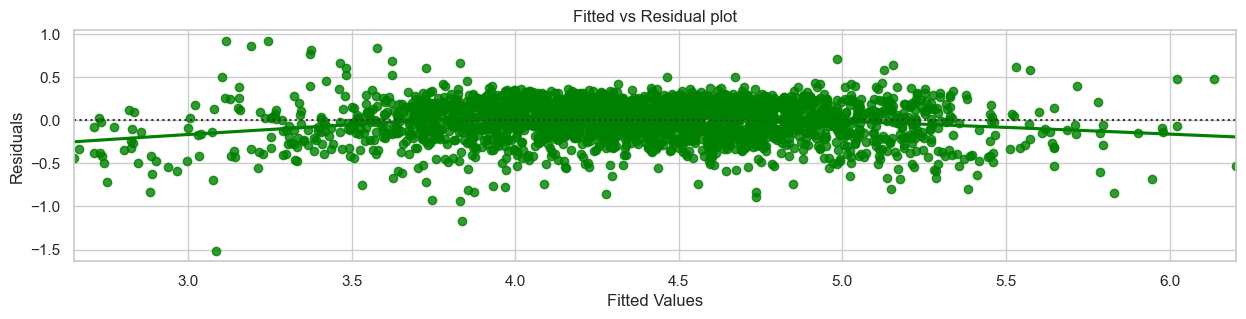

In [309]:
# let's plot the fitted values vs residuals
sns.set_style("whitegrid")
plt.figure(figsize = (15,3))  
sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="green", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

Observation:
    
1. The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

2. As there is very little pattern in the plot above, we will consider that the assumptions of linearity
   and independence are satisfied.

### TEST FOR NORMALITY

We will test for normality by 
   1. Checking the distribution of residuals, 
   2. Checking the Q-Q plot of residuals, 
   3. Shapiro-Wilk test.


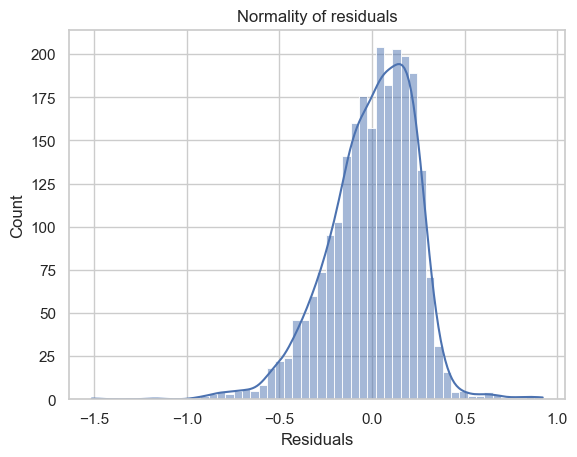

In [310]:
# Distribution of residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

Observation:
    
1. The histogram plot of residual has little tilted bell shape curve, is almost normally distributed.
2. We will try other test to check if residuals are normally distributed.

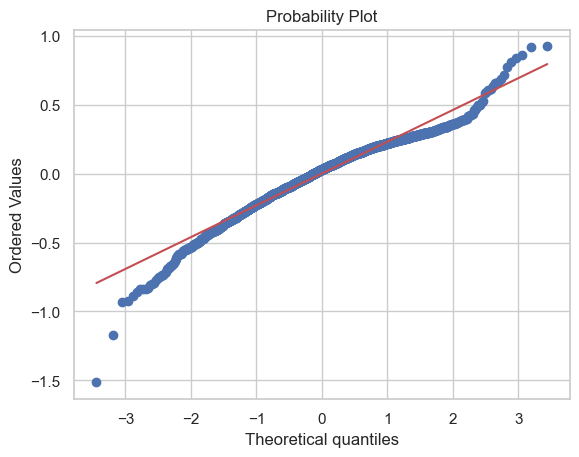

In [311]:
#Plot the Q-Q plot.
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Shapiro-Wilk test**

 - Null hypothesis: Residuals are normally distributed
 - Alternate hypothesis: Residuals are not normally distributed

In [312]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995261942370773e-23)

Observation:
    
1. As p-value of the Shapiro-Wilk test p <  0.05, we cannot say the residuals are normally distributed from this test.
2. However, from histogram plot of residual and Q_Q plot, we can accept this distribution as close to being normal.
3. Will conclude that assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY



- We will use goldfeldquandt test for homoscedasticity.
- If we get a p > 0.05, we will infer that residuals are homoscedastic, otherwise heteroscedastic.

In [313]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0087504199106758), ('p-value', 0.4401970650667301)]

Observation:
    
1. Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

## Predictions on test data

In [314]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.385671
2341,3.696103,4.003934
1913,3.592093,3.643812
688,4.306495,4.103463
650,4.522115,5.113026
2291,4.259294,4.398406
40,4.997685,5.459871
1884,3.875359,4.053143
2538,4.206631,4.035868
45,5.380450,5.227899


Observation:

1.  The model has returned good prediction results, and the actual and predicted values are comparable.

## Final Model Summary

In [315]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [316]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                           12:29:41   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [317]:
# checking model performance on train set 
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [318]:
# checking model performance on test set 
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


Observation:

1. The training 𝑅-squared is 0.839, so the model is not underfitting

2. The train and test data RMSE and MAE are quite low and comparable with each other, indicating model is not overfitting.

3. MAE (Mean absolute error) suggests that the model can predict normalized price within a mean adjusted error of 0.186 on the test data.

4. MAPE of 4.556 on the test data means that we are able to predict within 4.556% of the normalized price of old phones

## Conclusions

1. The model is able to explain 83.9% of the variation in the data and predict within 4.55% of the normalized 
   price of old phones on the test data. 
   
2. The R-Squared for training is .839 which indicates the model is not underfitting and predicted R-squared .838 for test data indicates no overfitting as well. 

3. The model can predict normalized_used_price of phones within an error(MAE)of 0.186.

4. The normalized_used_price is affected by 14 predictor variables only.

5. If the main_camera_mp increases by one unit, then normalized_used_price of the phone increases by 0.0210 units, all other variables held constant.

6. With increase in selfie_camera_mp by one unit, normalized_used_price of phone increases by 0.0138 units, all other variables held constant.

7. With increase in ram by one unit, normalized_used_price of phone increases by 0.0207, all other variables held constant.

8. As the coefficient of weight is .0017, the normalized_used_price will change by .0017 with one unit change in weight.

9. As the coefficient of normalized_new_price is .4415, increase in normalized_new_price by €1 will increase normalized_used_price by €.4415.

10. The years_sincereleased is negatively(-.0292) correlated with used price, therefore each year after its release the normalized_used_price decreases by €.0292.

11. The brands Karbonn and Xiaomi have positive coefficients, and brands like Samsung and Sony brands have negative coefficients with normalized_used_price.

13. The normalized_used_price is positively correlated to presence of 4g by 0.0502, and negatively correlated with 5g presence by .0673.


## Actionable Insights and Recommendations 

 
1. This model can predict normalized_used_price of phones within an error(MAE)of 0.186.

2. With high R-squared value and low MAPE (Mean absolute percentage error)value this model seems to be quite good for prediction as well as inference purpose. 

3. Higher camera's resolution (main or selfie camera) will automatically increase the price for used devices. 

4. Higher ram and weight also have a positive impact on normalized price for used phones or tablets. 

5. The price of a used phone is quite dependent on the price of a new phone, therefore an expensive new phone will have a higher price for used devices too. 

6. The price constantly decreases with every year after its release. 

7. The brands Karbonn and Xiaomi usually will have higher prices for used phones. 

8. Samsung and Sony brands have lower normalized_used_price than other brands.

9. The availability of 4G has a positive impact on the price of used devices. 

10. As only 152 phones in this dataset have 5g, the inference that presence of 5g negatively impacts price requires further investigation with a larger 5g data set.



- 


___